In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy.external as sce
import gseapy

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")


-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bioservices         1.7.11
boto3               1.20.24
botocore            1.23.24
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gridfs     

In [7]:
heart_infection_sc_no_viral_genes = sc.read_h5ad(filename="./../../../pyobjs_github/heart_infection_sc_new.h5ad")

In [8]:
fibroblasts = heart_infection_sc_no_viral_genes.raw.to_adata()[heart_infection_sc_no_viral_genes.obs["celltype_groups"].isin(["Fibroblasts"])]
sc.pp.filter_genes(fibroblasts, min_cells = 10)
fibroblasts

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


filtered out 5172 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 9442 × 17585
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_groups_colors', 'celltypes_leiden_0.5_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups_celltypes_leiden_0.5', 'rank_genes_groups_leiden_0.3', 'rank_genes_groups_leiden_0.5'

In [9]:
s_genes = list(pd.read_csv("./../../../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


extracting highly variable genes
    finished (0:00:10)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


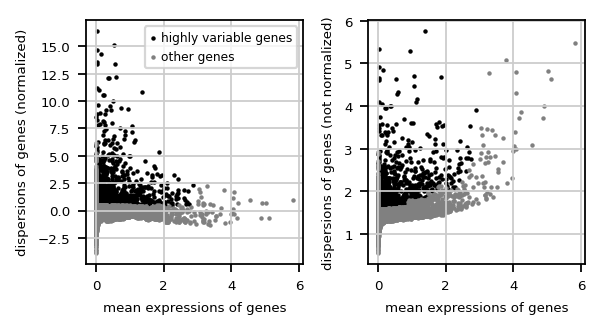

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    628 total control genes are used. (0:00:00)
computing score 'G2M_score'


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    624 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:02:21)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


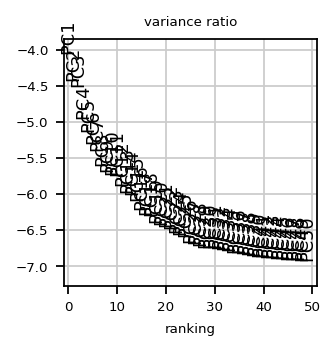

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)
running Leiden clustering
    finished: found 12 clusters and added
    'fibro_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'fibro_leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 7 clusters and added
    'fibro_leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:00)


In [10]:
sc.pp.highly_variable_genes(fibroblasts, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fibroblasts, )
sc.tl.score_genes_cell_cycle(fibroblasts, s_genes=s_genes, g2m_genes=g2m_genes)
fibroblasts.raw = fibroblasts
fibroblasts = fibroblasts[:, fibroblasts.var.highly_variable]
sc.pp.regress_out(fibroblasts, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(fibroblasts, max_value=10)
sc.tl.pca(fibroblasts, svd_solver='arpack', random_state=0)
sc.pl.pca_variance_ratio(fibroblasts, n_pcs = 50, log=True)
sc.pp.neighbors(fibroblasts, n_pcs=20)
sc.tl.umap(fibroblasts)
sc.tl.leiden(fibroblasts, key_added="fibro_leiden_0.5", resolution = 0.5)
sc.tl.leiden(fibroblasts, key_added="fibro_leiden_0.3", resolution = 0.3)
sc.tl.leiden(fibroblasts, key_added="fibro_leiden_0.2", resolution = 0.2)

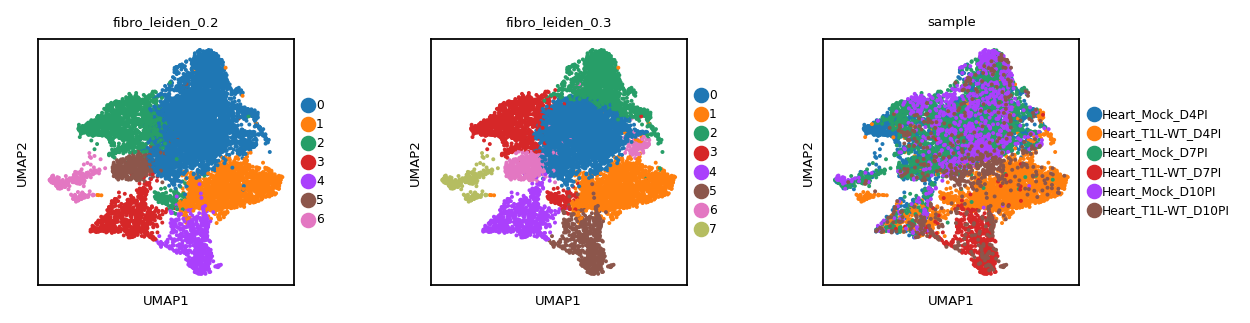

In [16]:
sc.pl.umap(fibroblasts, color = ["fibro_leiden_0.2", "fibro_leiden_0.3", "sample"])

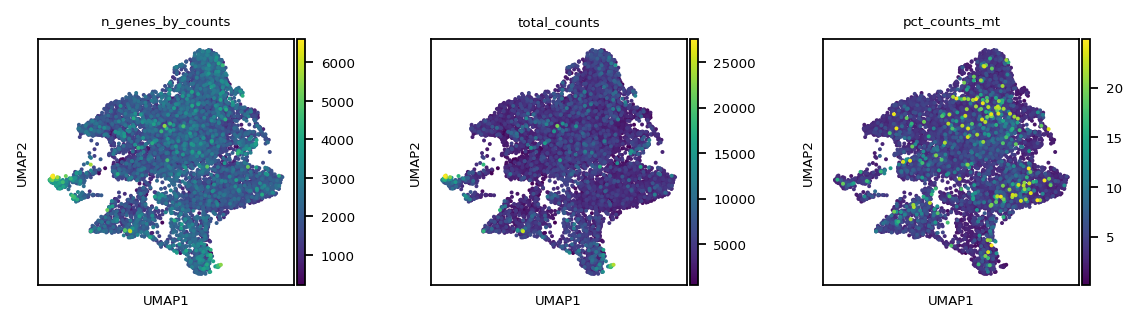

In [12]:
sc.pl.umap(fibroblasts, color = ['n_genes_by_counts', 'total_counts', "pct_counts_mt"], ncols=3)

In [13]:
sc.tl.rank_genes_groups(fibroblasts, groupby='fibro_leiden_0.2', method='wilcoxon', key_added='rank_genes_groups_fibro_leiden_0.2')

ranking genes
    finished: added to `.uns['rank_genes_groups_fibro_leiden_0.2']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


In [14]:
pd.DataFrame(fibroblasts.uns['rank_genes_groups_fibro_leiden_0.2']["names"]).head(20)

,0,1,2,3,4,5,6
0,Itm2a,Ifi27l2a,Eln,1500015O10Rik,H2-K1,Acta2,Fabp4
1,Dcn,Ifitm3,Mfap4,Cd9,B2m,Apoe,Gpihbp1
2,Lamc1,Bst2,Csrp2,Timp3,H2-D1,Tpm2,Cdh5
3,Lamb1,Isg15,Gxylt2,Vim,Serping1,Tagln,Cav1
4,Pcsk6,Xist,Osr1,Apoe,Iigp1,Rgs5,Cd36
5,Adamts5,Ly6e,Cst3,Dbi,H2-Q7,Sept7,Egfl7
6,Mfap5,Lgals3bp,Fbln5,Fmod,H2-T23,Col4a1,Cd93
7,Lum,B2m,Rbp1,Dkk3,Ifitm3,Filip1l,Kdr
8,Akap12,Ifit3,Mgp,Thbs1,Ly6a,Daam1,Pecam1
9,Cd34,Irf7,Pmepa1,Pdlim3,Ly6e,Cdc42ep3,Fabp5


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_fibro_leiden_0.2']`


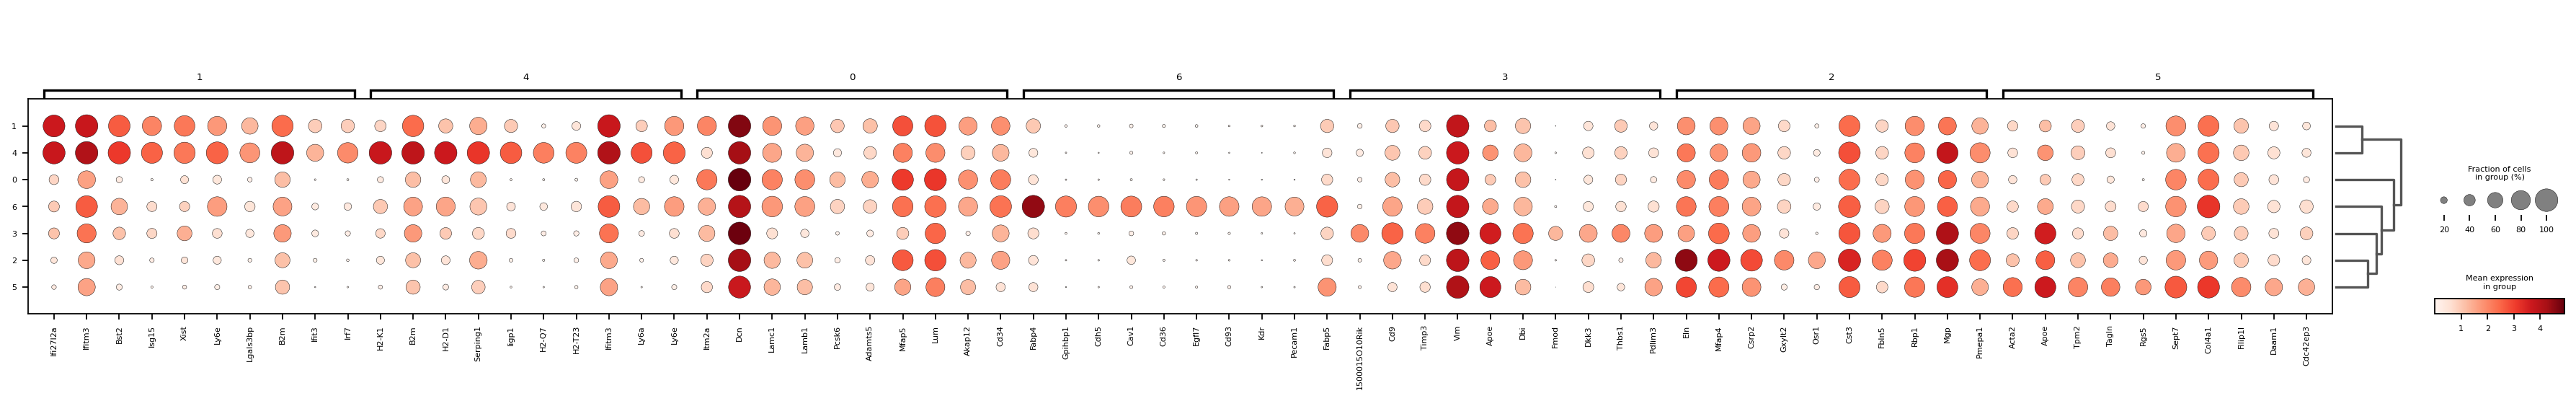

In [15]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")
sc.pl.rank_genes_groups_dotplot(fibroblasts, key='rank_genes_groups_fibro_leiden_0.2', n_genes=10)

In [ ]:
# Cluster 5 represents endothelial cells: Acta2+ and Tagln+
# Cluster 6 represents endothelial cells: Cdh5+ and Pecam1+
# Removing endothelial cells and smooth muscle cells

In [17]:
fibroblasts_only = fibroblasts[~fibroblasts.obs["fibro_leiden_0.2"].isin(["5", "6"])]

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


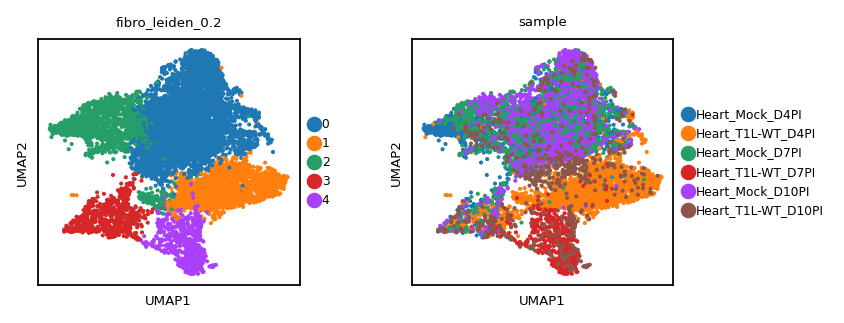

In [18]:
sc.pl.umap(fibroblasts_only, color = ["fibro_leiden_0.2", "sample"], wspace=0.3)

In [19]:
fibroblasts_only.obs["cell_phenotypes"] = fibroblasts_only.obs["fibro_leiden_0.2"]
phenotypes = {'0': "Uninflamed fibroblasts", 
                '1': "Inflamed fibroblasts", 
                "2" : "Uninflamed fibroblasts",
                '3': "Mesenchymal fibroblasts",
                '4': "Ccl2+ fibroblasts"}
fibroblasts_only.obs["cell_phenotypes"] = fibroblasts_only.obs["cell_phenotypes"].map(phenotypes).astype("category")

Trying to set attribute `.obs` of view, copying.


In [20]:
sc.tl.rank_genes_groups(fibroblasts_only, groupby='cell_phenotypes', method='wilcoxon', key_added='rank_genes_groups_cell_phenotypes')

ranking genes
    finished: added to `.uns['rank_genes_groups_cell_phenotypes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


In [21]:
pd.DataFrame(fibroblasts_only.uns['rank_genes_groups_cell_phenotypes']["names"]).head(20)

,Ccl2+ fibroblasts,Inflamed fibroblasts,Mesenchymal fibroblasts,Uninflamed fibroblasts
0,H2-K1,Ifi27l2a,1500015O10Rik,Col15a1
1,B2m,Ifitm3,Cd9,Lum
2,H2-D1,Bst2,Apoe,Col14a1
3,Serping1,Isg15,Vim,Mfap5
4,Iigp1,Xist,Timp3,Lama2
5,H2-Q7,Ly6e,Fmod,Akap12
6,H2-T23,Lgals3bp,Dbi,Mfap4
7,Ifitm3,B2m,Dkk3,Eln
8,Ly6a,Ifit3,Pdlim3,Lamb1
9,Ly6e,Irf7,Thbs1,Nedd4


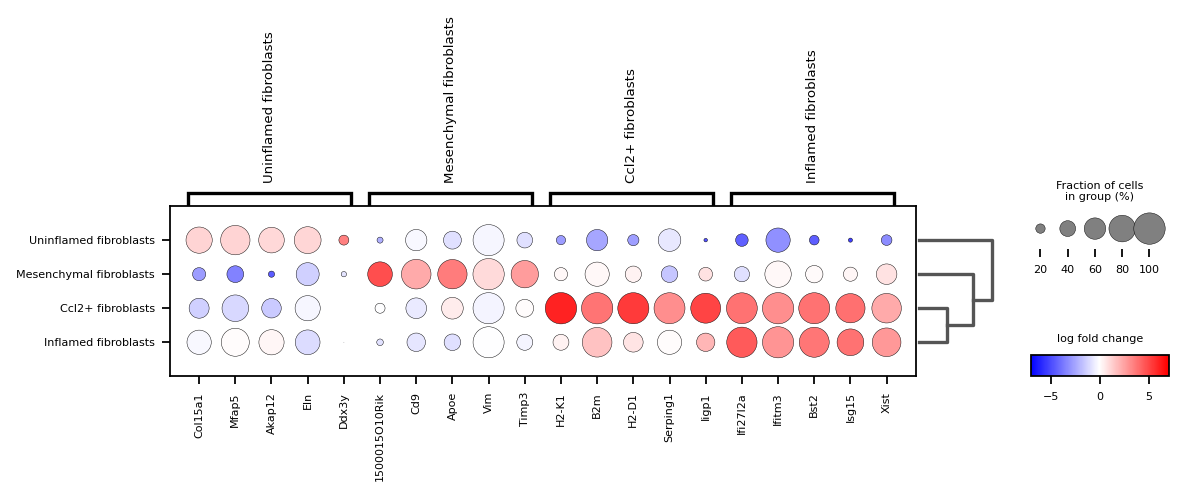

In [33]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (8,2.5))
sc.pl.rank_genes_groups_dotplot(fibroblasts_only, n_genes=5, key="rank_genes_groups_cell_phenotypes", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/fibro_dotplot.pdf")

In [23]:
fibroblasts_only.write_h5ad("./../../../pyobjs_github/fibroblasts_only.h5ad")

In [4]:
fibroblasts_only = sc.read_h5ad("./../../../pyobjs_github/fibroblasts_only.h5ad")

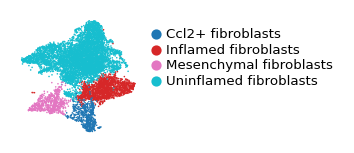

In [34]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(fibroblasts_only, color = ["cell_phenotypes"], size=2, frameon=False, palette="tab10", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_fibro_celltypes_02.pdf")

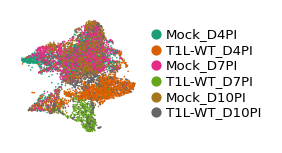

In [35]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(fibroblasts_only, color = ["condition"], size=2, frameon=False, palette="Dark2", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_fibro_condition.pdf")

In [27]:
sc.tl.rank_genes_groups(fibroblasts_only, groupby="cell_phenotypes", groups=["Inflamed fibroblasts"], reference="Uninflamed fibroblasts", key_added="inflamed_fibro_markers")
sc.tl.rank_genes_groups(fibroblasts_only, groupby="cell_phenotypes", groups=["Ccl2+ fibroblasts"], reference="Inflamed fibroblasts", key_added="Ccl2_fibro_markers")

ranking genes
    finished: added to `.uns['inflamed_fibro_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['Ccl2_fibro_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [31]:
inflamed_fibro_markers = sc.get.rank_genes_groups_df(fibroblasts_only, group="Inflamed fibroblasts", key="inflamed_fibro_markers")
inflamed_fibro_markers.to_csv("./../../../csvs_github/fibroblast_only_inflamed_fibro_markers.csv")
print(inflamed_fibro_markers[1:40])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
       names     scores  logfoldchanges          pvals      pvals_adj
1   Ifi27l2a  99.846474        5.215942   0.000000e+00   0.000000e+00
2       Bst2  92.995361        4.794739   0.000000e+00   0.000000e+00
3      Isg15  63.958893        5.559713   0.000000e+00   0.000000e+00
4       Xist  59.640480        3.448549   0.000000e+00   0.000000e+00
5       Ly6e  49.872261        3.127154   0.000000e+00   0.000000e+00
6        B2m  47.418278        2.212993   0.000000e+00   0.000000e+00
7   Lgals3bp  43.726391        3.837473  1.228179e-289  2.399726e-286
8       Irf7  34.810574        4.433620  5.754206e-203  9.198883e-200
9      Ifit3  34.144035        4.302074  2.686035e-197  3.936161e-194
10     Iigp1  32.534882        4.184083  4.598254e-183  6.220023e-180
11     Oasl2  31.659275        4.351662  1.245477e-174  1.564408e-171
12    

In [32]:
ccl2_fibro_markers = sc.get.rank_genes_groups_df(fibroblasts_only, group="Ccl2+ fibroblasts", key="Ccl2_fibro_markers")
ccl2_fibro_markers.to_csv("./../../../csvs_github/fibroblast_only_ccl2_fibro_markers.csv")
print(ccl2_fibro_markers[1:40])

        names     scores  logfoldchanges          pvals      pvals_adj
1       H2-D1  63.217514        4.239477   0.000000e+00   0.000000e+00
2         B2m  47.672157        2.206099  6.719293e-322  3.938627e-318
3       H2-Q7  46.417938        5.241693  2.377519e-218  8.361735e-215
4    Serping1  42.973701        2.795703  1.251123e-258  5.500251e-255
5      H2-T23  38.328938        3.553168  9.014002e-191  2.641854e-187
6       Iigp1  33.654255        2.938563  1.728698e-172  4.342735e-169
7        Ly6a  32.718117        3.360273  6.678153e-161  1.467942e-157
8          C3  30.788784        6.921767  5.455181e-125  8.720851e-122
9       Psmb8  29.922100        2.753315  4.760665e-139  8.371629e-136
10      Psmb9  27.359568        3.391464  1.655668e-114  2.079637e-111
11       Igtp  27.326687        3.337522  6.894365e-115  9.325954e-112
12       Zbp1  26.948580        3.588162  1.283698e-110  1.504922e-107
13  Serpina3n  26.799540        6.932569  1.058536e-103  1.163397e-100
14    

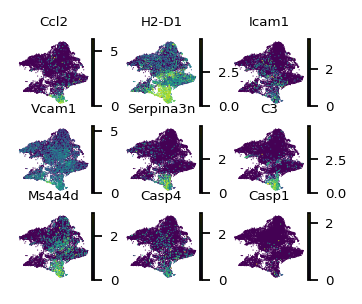

In [37]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(0.6, 0.6), transparent=True, format="pdf", vector_friendly = False)
sc.pl.umap(fibroblasts_only, color = ["Ccl2", "H2-D1", "Icam1", "Vcam1", "Serpina3n", "C3", "Ms4a4d", "Casp4", "Casp1"], size=1, cmap="viridis", wspace = 0.3, hspace = 0.3, ncols=3, frameon=False, add_outline=False, save="fibrofeatureplot.pdf")